In [26]:
using Plots, Images, ImageView

┌ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]
└ @ Base loading.jl:1260


In [278]:
function get_iter(c,thresh=4, max_steps = 25)
    z, i = c, 1
    
    z = z[1]+z[2]im
    c = c[1]+c[2]im
    conz = conj(z)
    #@show z, conj.(z)
    #@show z*z
    while (i<max_steps) && (real(z*conz) < thresh)
        z = z*z +c
        
        i +=1
    end
    #@show z    
    return i 
end

get_iter (generic function with 3 methods)

In [315]:
function plotter(n , thresh, max_steps= 50,mxv = 2.48, myv = 2.26)
    mx = mxv/(n-1)
    my = myv/(n-1)
    mapper(x,y) = (mx*x - 2, my*y - 1.13)
    img = ones(n,n).*255
    for x in collect(1:n)
        for y in collect(1:n)
            temp = mapper(x-1,y-1)
            #@info temp
            temp = complex.(temp)
            #@info temp
            it = get_iter(temp,thresh, max_steps)
            #@show it
            #@info x,y
            img[y,x] = 255- it
            
        end
        #break
    end
    return img
end

plotter (generic function with 4 methods)

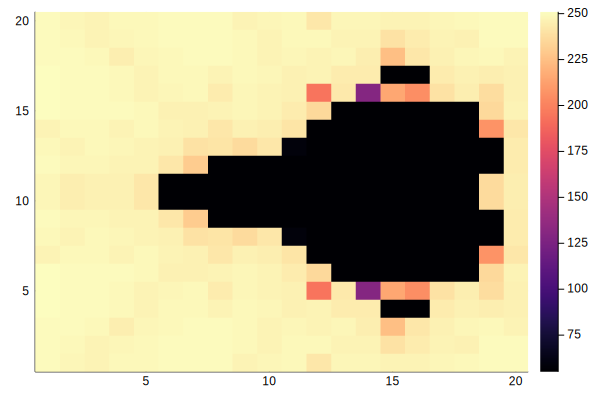

In [321]:
fractal_img = plotter(20,50,200);
heatmap(fractal_img, fillcolor = :magma)

In [290]:
prob = rand(1)[1]
            if prob>.5
                img[y,x] = 255- it
            elseif prob >.8
                img[y,x] = 155- it
            else
                img[y,x] = 100- it
            end

1-element Array{Float64,1}:
 0.4060045895958302

In [306]:
using Latexify

In [314]:
print(latexify("(mx*x - 2, my*y - 1.13)"))

$mx \cdot x - 2, my \cdot y - 1.13$

$$mx = \frac{2.48}{n - 1}$ 